In [31]:
import os

DATA_FOLDER = os.path.join(os.getcwd(), 'data')
DATA_FILE = os.path.join(DATA_FOLDER, 'Salary_dataset.csv')

try:
    if not os.path.exists(DATA_FOLDER):
        os.makedirs(DATA_FOLDER) # if not exist create the dir
    print(f"Data folder found: {DATA_FOLDER}\nContains dataset: {os.path.basename(DATA_FILE)}")
except Exception as e:
    # Handle the exception
    print(f"Error: {e}")

Data folder found: C:\Users\ffore\Desktop\Francesco - QNAP\ML\Univariate Linear Regression\data
Contains dataset: Salary_dataset.csv


In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(DATA_FILE)
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [39]:
# Table adjustments
df.drop(columns=['Unnamed: 0'], inplace=True)
df.rename(columns={"YearsExperience": 'YearsOfExperience'}, inplace=True)
df.head()

,YearsOfExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [40]:
# check data type and non-null elements
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearsOfExperience  30 non-null     float64
 1   Salary             30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [41]:
# Set up prediction target, and input features
y = df.Salary
x = df.YearsOfExperience

# adjustment for scikit-learn with 1D array 
x = np.array(x).reshape(-1, 1)

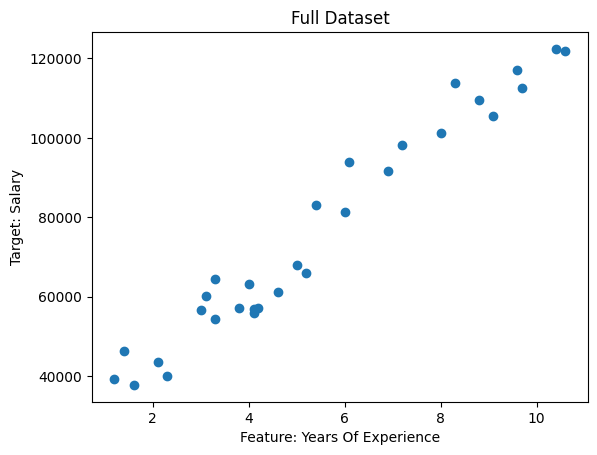

In [42]:
# Dataset Visualization 
plt.scatter(x, y)
plt.title('Full Dataset')
plt.xlabel('Feature: Years Of Experience')
plt.ylabel('Target: Salary')
plt.show()

In [44]:
# Training set and validation set
x_train, x_validation, y_train, y_validation = train_test_split(x, y, random_state=0)


In [45]:
# Model: Univariate Linear Regressor
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
y_hat = linear_regression_model.predict(x_validation)

In [46]:
# Model Error: MAE
print(f"Model Error: \u00B1 {mean_absolute_error(y_validation, y_hat)} usd")

Model Error: ± 3508.5455930660546 usd


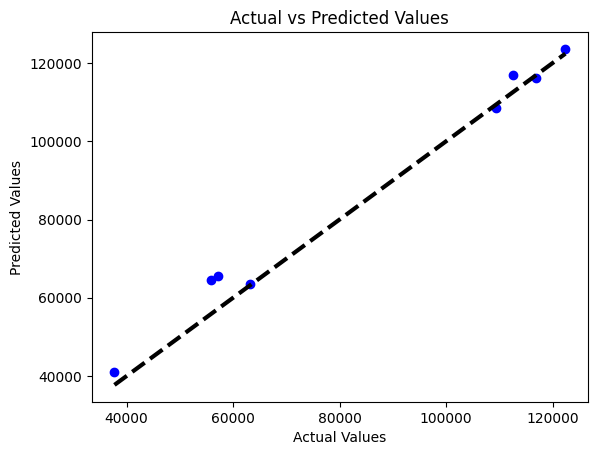

In [47]:
# Model Evaluation 1: Predictions vs. Actual Values
plt.scatter(y_validation, y_hat, color='blue')  # Predictions vs actual values
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=3)  # Ideal line where predictions match actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

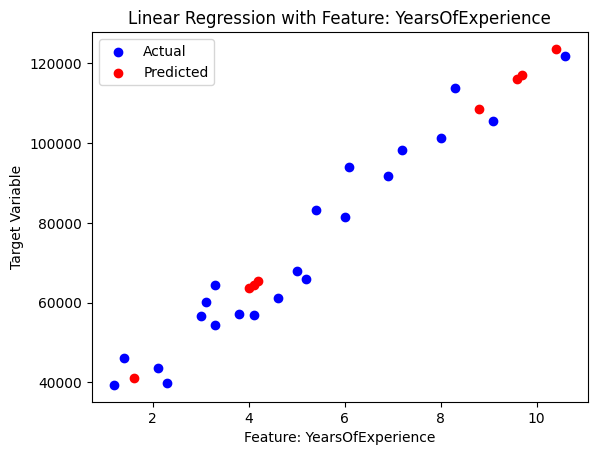

In [48]:
# Model Evaluation 2: The Feature vs Target
plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.scatter(x_validation, y_hat, color='red', label='Predicted')
plt.xlabel(f'Feature: {"YearsOfExperience"}')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression with Feature: {"YearsOfExperience"}')
plt.legend()
plt.show()

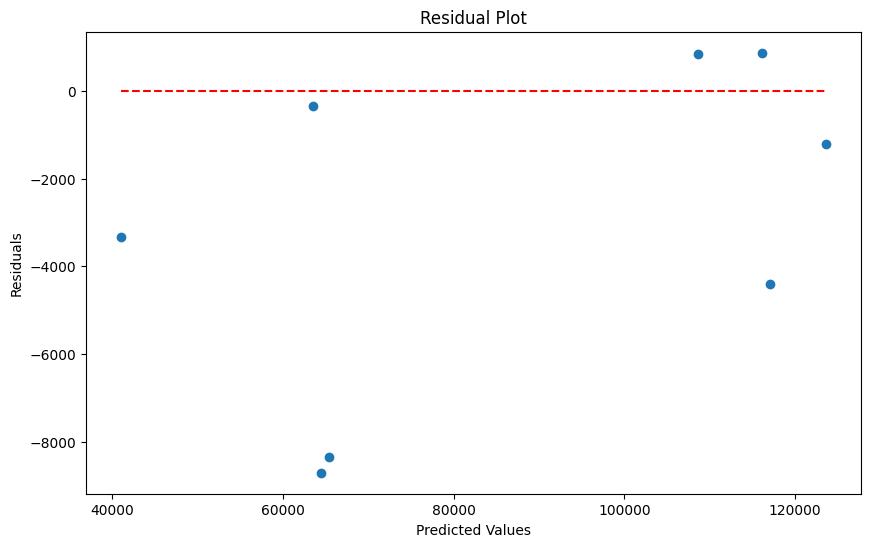

In [49]:
# Model Evaluation 3: Residuals plot
residuals = y_validation - y_hat

plt.figure(figsize=(10, 6))
plt.scatter(y_hat, residuals)
plt.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()